In [4]:
# config
import common.init as init
from singleton_pattern.load_model import get_model
from  singleton_pattern.load_config import get_config,get_non_dnn_method_list
from singleton_pattern.load_dataset_reader import get_train_reader,get_test_reader
from singleton_pattern.load_data_generator import get_train_data_generator,get_test_data_generator
from common.cache import Cache
from common.cuda_info import get_device
config_name = 'PhysNet.yaml'
# config_name = 'POS.yaml'
# init
init.run(config_name)

CUDA:
---------------------------
PyTorch supports GPU and currently has 1 CUDA devices available.
The current default CUDA device is: NVIDIA GeForce RTX 3090
---------------------------
Method and DataGenerator Name: PhysNet


In [5]:
config = get_config()
non_dnn_method_list = get_non_dnn_method_list()
model = get_model()
is_need_train = config['method'] not in non_dnn_method_list
train_dataloader = None
# load train dataset
if is_need_train:
    train_reader = get_train_reader()
    print(f'train_reader: {train_reader.loader_name}')
    train_data = train_reader.load_data()
    train_data_generator = get_train_data_generator()
    train_dataloader = train_data_generator.get_tensor_dataloader(train_data)
# load test dataset
test_reader = get_test_reader()
test_data_generator = get_test_data_generator()
print(f'Test Loader: {test_reader.loader_name}')
test_data = test_reader.load_data()
test_dataloader = test_data_generator.get_tensor_dataloader(test_data)

train_reader: UBFC_Phys
Root Path:D:\dataset\compression\UBFC-PHYs_2_11
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/10 [00:00<?, ?it/s]

cache path:cache\TRAIN\c5399b09bc23bf6832f592aa3c5d21ec89be0bd2ebcde78d0e7dce7d64fa20d8
Start Generator Data...
cv2: CUDA is not available.


Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Processing videos 1 :   0%|          | 0/6326 [00:00<?, ?it/s]

Processing videos 2 :   0%|          | 0/6325 [00:00<?, ?it/s]

Processing videos 3 :   0%|          | 0/6326 [00:00<?, ?it/s]

Processing videos 4 :   0%|          | 0/6326 [00:00<?, ?it/s]

Processing videos 5 :   0%|          | 0/6326 [00:00<?, ?it/s]

Processing videos 6 :   0%|          | 0/6326 [00:00<?, ?it/s]

optimizer:Adamax (
Parameter Group 0
    betas: (0.9, 0.999)
    eps: 1e-08
    foreach: None
    lr: 1e-06
    maximize: False
    weight_decay: 0
)
criterion:PhyNetLoss(
  (neg_pearson_Loss): NegPearsonLoss(
    (pearson): PearsonLoss()
  )
)


Progress:   0%|          | 0/200 [00:00<?, ?it/s]

cache path:cache\MODEL\
Epoch [1/200],Train Loss: 1.0011,Test Loss: 0.9967
Epoch [2/200],Train Loss: 0.9988,Test Loss: 0.9961
Epoch [3/200],Train Loss: 0.9967,Test Loss: 0.9955
Epoch [4/200],Train Loss: 0.9946,Test Loss: 0.9949
Epoch [5/200],Train Loss: 0.9924,Test Loss: 0.9942
Epoch [6/200],Train Loss: 0.9902,Test Loss: 0.9933
Epoch [7/200],Train Loss: 0.9878,Test Loss: 0.9924
Epoch [8/200],Train Loss: 0.9852,Test Loss: 0.9913
Epoch [9/200],Train Loss: 0.9823,Test Loss: 0.9901
Epoch [10/200],Train Loss: 0.9790,Test Loss: 0.9888
Epoch [11/200],Train Loss: 0.9751,Test Loss: 0.9872
Epoch [12/200],Train Loss: 0.9704,Test Loss: 0.9855
Epoch [13/200],Train Loss: 0.9643,Test Loss: 0.9834
Epoch [14/200],Train Loss: 0.9553,Test Loss: 0.9807
Epoch [15/200],Train Loss: 0.9389,Test Loss: 0.9770
Epoch [16/200],Train Loss: 0.8954,Test Loss: 0.9772
Epoch [17/200],Train Loss: 0.8319,Test Loss: 0.9840
Epoch [18/200],Train Loss: 0.7975,Test Loss: 0.9867
Epoch [19/200],Train Loss: 0.7720,Test Loss: 0.98

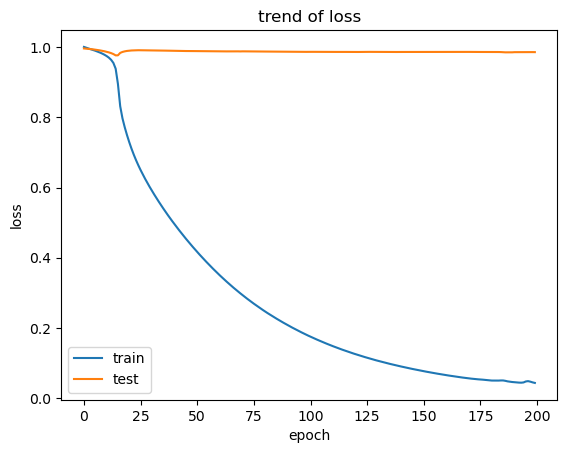

train end: best loss 0.9389, best test loss 0.9770, Epoch 15
train total time:  2h:54m:0s


In [ ]:
from common.cache import CacheType

# if cached and want to second training, set train_twice = True
train_twice = False
# train
if not is_need_train:
    print('non train.')
else:
    from common.train_model import run as run_train
    if train_dataloader is None:
        raise Exception('load train dataloader first')
    if train_twice:
        cache_model = Cache(CacheType.MODEL).read_model()
        model.load_state_dict(cache_model.state_dict())
    run_train(model,train_dataloader,test_dataloader)

In [1]:
# load test model
use_cache_model = True

import matplotlib.pyplot as plt
import numpy as np
if use_cache_model and is_need_train:
    cache_model = Cache(CacheType.MODEL).read_model()
    model.load_state_dict(cache_model.state_dict())
model.eval()
model.to(get_device())
pass

NameError: name 'is_need_train' is not defined

RuntimeError: number of dims don't match in permute

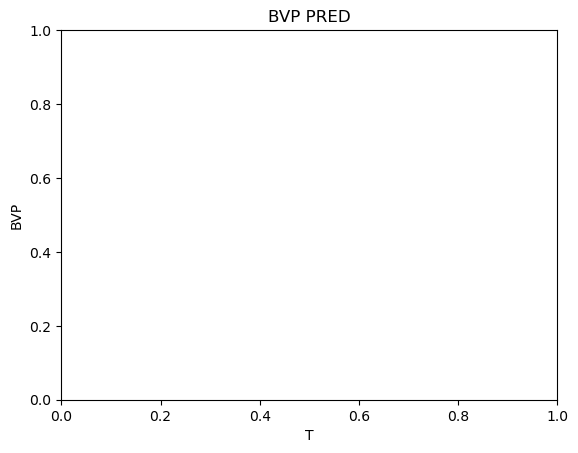

In [5]:
# output image
i = 0
gpu_device = get_device()
for batch_X, batch_y in test_dataloader:
    index_n = 7
    if i == index_n:
        plt.title("BVP PRED")
        plt.xlabel("T")
        plt.ylabel("BVP")

        batch_X = batch_X.to(gpu_device)
        batch_y = batch_y.to(gpu_device)
        pred = model(batch_X)
        true_data = np.array(batch_y.detach().view(-1).numpy())
        pred_data = np.array(pred.detach().view(-1).numpy())
        true_data = true_data = (true_data - true_data.mean())/true_data.std()
        pred_data = pred_data = (pred_data - pred_data.mean())/pred_data.std()
        plt.plot(true_data, label="True Line")
        plt.plot(pred_data, label="Pred Line")
        plt.legend()
        plt.show()
    if i > index_n:
        break
    i+=1


In [ ]:
try:
    while True:
        pass
except KeyboardInterrupt:
    print("hhh")

hhh
